In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv ("updated_healthcare_data.csv")

In [28]:
df

,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department
0,2025-04-09,outpatient,127,99,2,0,paid,179.199997,30,1,...,edinburgh,northern ireland,fracture,ct scan,axa,dr. olu abisola,male,nigerian,37,orthopedics
1,2024-06-23,emergency,624,171,2,1,paid,563.500000,10,2,...,london,scotland,asthma,ultrasound,aviva,dr. sade kikiola,female,nigerian,35,general surgery
2,2025-02-07,emergency,301,91,8,0,paid,295.399994,30,3,...,edinburgh,northern ireland,asthma,ultrasound,axa,dr. sade kikiola,female,nigerian,35,neurology
3,2024-09-15,outpatient,234,174,3,0,paid,285.600006,0,4,...,edinburgh,england,hypertension,blood test,allianz,dr. emma jones,female,european,34,cardiology
4,2024-04-15,outpatient,621,27,1,0,pending,453.600006,0,5,...,edinburgh,england,asthma,ct scan,allianz,dr. sade kikiola,female,nigerian,35,cardiology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2025-01-21,outpatient,841,178,10,0,paid,734.299988,30,4969,...,birmingham,wales,asthma,ultrasound,axa,dr. olu abisola,male,nigerian,37,neurology
4996,2024-08-11,inpatient,422,127,9,0,paid,391.299988,10,4970,...,liverpool,scotland,hypertension,x-ray,allianz,dr. johnson grek,male,european,50,neurology
4997,2024-04-07,emergency,286,44,1,0,pending,266.000000,50,4971,...,bristol,northern ireland,asthma,x-ray,axa,dr. sade kikiola,female,nigerian,35,orthopedics
4998,2025-03-09,outpatient,554,134,7,0,pending,481.600006,0,4972,...,birmingham,wales,fracture,ct scan,allianz,dr. johnson grek,male,european,50,neurology


In [29]:
df.head()

,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department
0,2025-04-09,outpatient,127,99,2,0,paid,179.199997,30,1,...,edinburgh,northern ireland,fracture,ct scan,axa,dr. olu abisola,male,nigerian,37,orthopedics
1,2024-06-23,emergency,624,171,2,1,paid,563.500000,10,2,...,london,scotland,asthma,ultrasound,aviva,dr. sade kikiola,female,nigerian,35,general surgery
2,2025-02-07,emergency,301,91,8,0,paid,295.399994,30,3,...,edinburgh,northern ireland,asthma,ultrasound,axa,dr. sade kikiola,female,nigerian,35,neurology
3,2024-09-15,outpatient,234,174,3,0,paid,285.600006,0,4,...,edinburgh,england,hypertension,blood test,allianz,dr. emma jones,female,european,34,cardiology
4,2024-04-15,outpatient,621,27,1,0,pending,453.600006,0,5,...,edinburgh,england,asthma,ct scan,allianz,dr. sade kikiola,female,nigerian,35,cardiology


In [30]:
print("Original Shape:", df.shape)
print("Data Types:\n", df.dtypes)
print("Null Values:\n", df.isnull().sum())

Original Shape: (5000, 24)
Data Types:
 Date_of_visit                  object
Service_Type                   object
Treatment_cost                  int64
Medication_cost                 int64
Patient_satisfaction_score      int64
Emergency_visit                 int64
Payment_status                 object
Insurance_coverage            float64
Room_Charges_daily_rate         int64
Patient_ID                      int64
Patient_Name                   object
Patient_Gender                 object
 Patient_Age                    int64
Race                           object
City                           object
State                          object
Diagnosis                      object
Procedure                      object
Insurance_Provider             object
Provider_Name                  object
Provider_Gender                object
Nationality                    object
Provider_Age                    int64
Department                     object
dtype: object
Null Values:
 Date_of_visit       

In [ ]:
df.isnull().sum()

Date_of_visit                   0
Service_Type                    0
Treatment_cost                  0
Medication_cost                 0
Patient_satisfaction_score      0
Emergency_visit                 0
Payment_status                  0
Insurance_coverage            119
Room_Charges_daily_rate         0
Patient_ID                      0
Patient_Name                    0
Patient_Gender                  0
 Patient_Age                    0
Race                            0
City                            0
State                           0
Diagnosis                       0
Procedure                       0
Insurance_Provider              0
Provider_Name                   0
Provider_Gender                 0
Nationality                     0
Provider_Age                    0
Department                      0
dtype: int64

In [ ]:
mean_insurance_coverage = df['Insurance_coverage'].mean()
df['Insurance_coverage'] = df['Insurance_coverage'].fillna(mean_insurance_coverage)

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [ ]:
df['Date_of_visit'] = pd.to_datetime(df['Date_of_visit'])
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date_of_visit               5000 non-null   datetime64[ns]
 1   Service_Type                5000 non-null   object        
 2   Treatment_cost              5000 non-null   int64         
 3   Medication_cost             5000 non-null   int64         
 4   Patient_satisfaction_score  5000 non-null   int64         
 5   Emergency_visit             5000 non-null   int64         
 6   Payment_status              5000 non-null   object        
 7   Insurance_coverage          5000 non-null   float64       
 8   Room_Charges_daily_rate     5000 non-null   int64         
 9   Patient_ID                  5000 non-null   int64         
 10  Patient_Name                5000 non-null   object        
 11  Patient_Gender              5000 non-null   object      

None

In [ ]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Apply cleaning steps to categorical columns
for col in categorical_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

display(df.head())

,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department
0,2025-04-09,outpatient,127,99,2,0,paid,179.199997,30,1,...,edinburgh,northern ireland,fracture,ct scan,axa,dr. olu abisola,male,nigerian,37,orthopedics
1,2024-06-23,emergency,624,171,2,1,paid,563.500000,10,2,...,london,scotland,asthma,ultrasound,aviva,dr. sade kikiola,female,nigerian,35,general surgery
2,2025-02-07,emergency,301,91,8,0,paid,295.399994,30,3,...,edinburgh,northern ireland,asthma,ultrasound,axa,dr. sade kikiola,female,nigerian,35,neurology
3,2024-09-15,outpatient,234,174,3,0,paid,285.600006,0,4,...,edinburgh,england,hypertension,blood test,allianz,dr. emma jones,female,european,34,cardiology
4,2024-04-15,outpatient,621,27,1,0,pending,453.600006,0,5,...,edinburgh,england,asthma,ct scan,allianz,dr. sade kikiola,female,nigerian,35,cardiology


In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_cols)

['Treatment_cost', 'Medication_cost', 'Patient_satisfaction_score', 'Emergency_visit', 'Insurance_coverage', 'Room_Charges_daily_rate', 'Patient_ID', ' Patient_Age', 'Provider_Age']


In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"Column: {col}, Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")

Column: Treatment_cost, Q1: 284.0, Q3: 765.0, IQR: 481.0
Column: Medication_cost, Q1: 64.0, Q3: 154.0, IQR: 90.0
Column: Patient_satisfaction_score, Q1: 1.0, Q3: 6.0, IQR: 5.0
Column: Emergency_visit, Q1: 0.0, Q3: 1.0, IQR: 1.0
Column: Insurance_coverage, Q1: 290.5, Q3: 619.5, IQR: 329.0
Column: Room_Charges_daily_rate, Q1: 0.0, Q3: 30.0, IQR: 30.0
Column: Patient_ID, Q1: 1244.75, Q3: 3731.25, IQR: 2486.5
Column:  Patient_Age, Q1: 34.0, Q3: 64.0, IQR: 30.0
Column: Provider_Age, Q1: 35.0, Q3: 45.0, IQR: 10.0


In [ ]:
outlier_bounds = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_bounds[col] = (lower_bound, upper_bound)
    print(f"Column: {col}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Column: Treatment_cost, Lower Bound: -437.5, Upper Bound: 1486.5
Column: Medication_cost, Lower Bound: -71.0, Upper Bound: 289.0
Column: Patient_satisfaction_score, Lower Bound: -6.5, Upper Bound: 13.5
Column: Emergency_visit, Lower Bound: -1.5, Upper Bound: 2.5
Column: Insurance_coverage, Lower Bound: -203.0, Upper Bound: 1113.0
Column: Room_Charges_daily_rate, Lower Bound: -45.0, Upper Bound: 75.0
Column: Patient_ID, Lower Bound: -2485.0, Upper Bound: 7461.0
Column:  Patient_Age, Lower Bound: -11.0, Upper Bound: 109.0
Column: Provider_Age, Lower Bound: 20.0, Upper Bound: 60.0


In [ ]:
outliers = {}
for col in numerical_cols:
    lower_bound, upper_bound = outlier_bounds[col]
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers for column '{col}':")
    display(outliers[col])

Outliers for column 'Treatment_cost':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Medication_cost':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Patient_satisfaction_score':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Emergency_visit':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Insurance_coverage':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Room_Charges_daily_rate':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Patient_ID':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column ' Patient_Age':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


Outliers for column 'Provider_Age':


,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department


In [ ]:
for col, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"Outliers found for column: {col}")
        display(outlier_df)
    else:
        print(f"No outliers found for column: {col} using the IQR method.")

No outliers found for column: Treatment_cost using the IQR method.
No outliers found for column: Medication_cost using the IQR method.
No outliers found for column: Patient_satisfaction_score using the IQR method.
No outliers found for column: Emergency_visit using the IQR method.
No outliers found for column: Insurance_coverage using the IQR method.
No outliers found for column: Room_Charges_daily_rate using the IQR method.
No outliers found for column: Patient_ID using the IQR method.
No outliers found for column:  Patient_Age using the IQR method.
No outliers found for column: Provider_Age using the IQR method.


  Patient_Gender     Diagnosis  count
0         female  appendicitis    486
1         female        asthma    453
2         female      fracture    302
3         female  hypertension   1018
4         female      migraine    241
5           male  appendicitis    508
6           male        asthma    465
7           male      fracture    304
8           male  hypertension    995
9           male      migraine    228


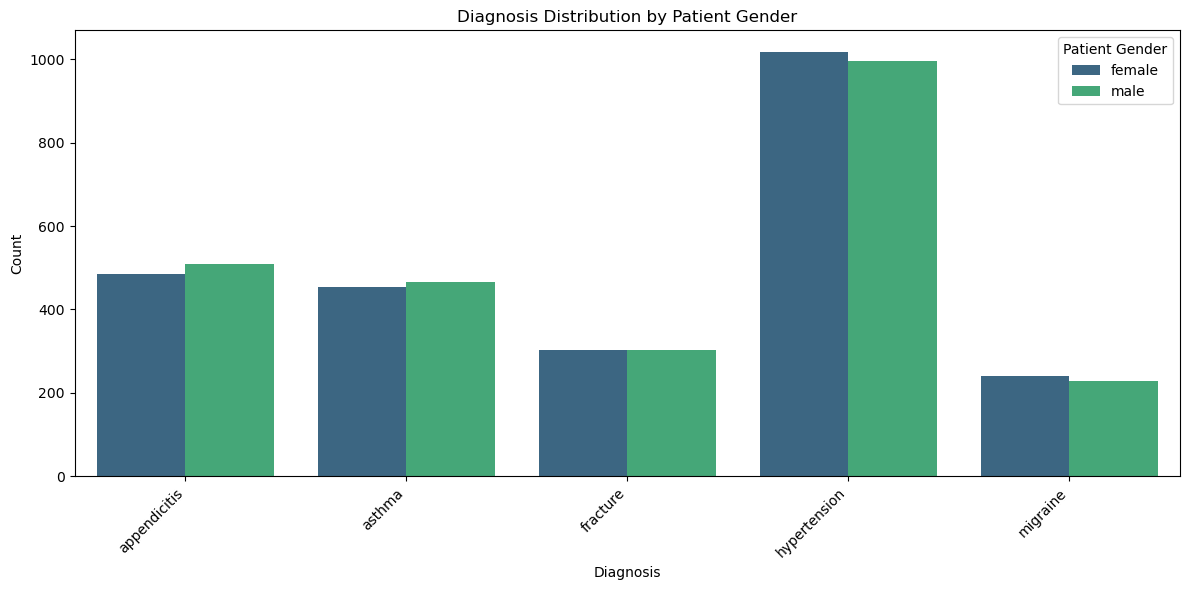

In [ ]:
# Group by Patient_Gender and Diagnosis and count occurrences
grouped_counts = df.groupby(['Patient_Gender', 'Diagnosis']).size().reset_index(name='count')
print(grouped_counts)

# Plot the distribution of diagnoses by gender
plt.figure(figsize=(12, 6))
sns.barplot(x='Diagnosis', y='count', hue='Patient_Gender', data=grouped_counts, palette='viridis')
plt.title("Diagnosis Distribution by Patient Gender")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.legend(title='Patient Gender')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

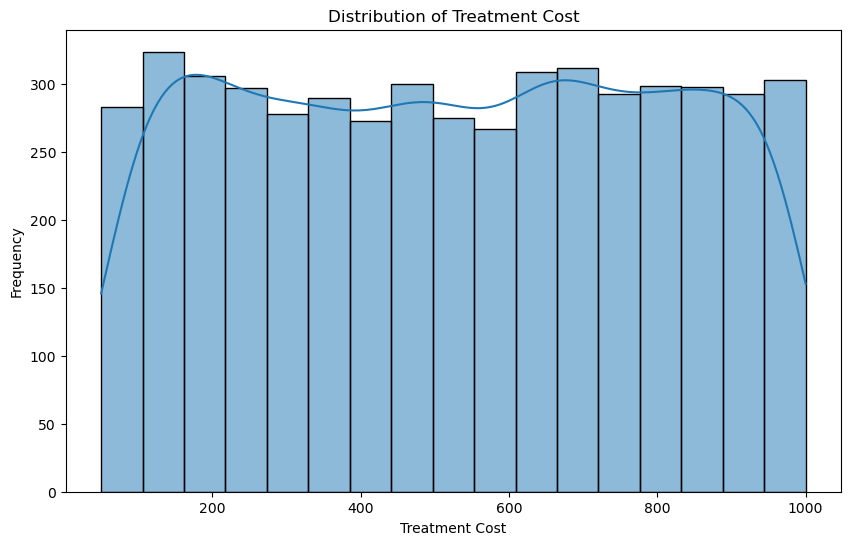

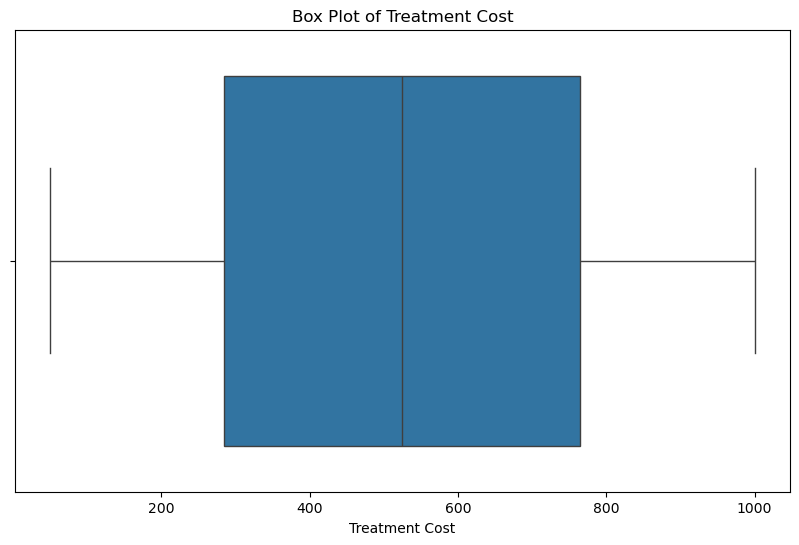

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Treatment_cost'], kde=True)
plt.title('Distribution of Treatment Cost')
plt.xlabel('Treatment Cost')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Treatment_cost'])
plt.title('Box Plot of Treatment Cost')
plt.xlabel('Treatment Cost')
plt.show()

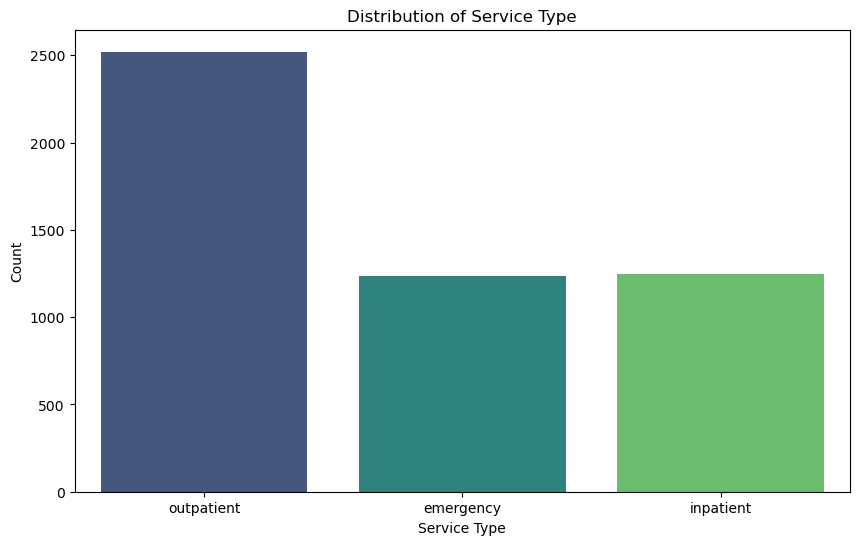

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Service_Type', data=df, hue='Service_Type', palette='viridis', legend=False)
plt.title('Distribution of Service Type')
plt.xlabel('Service Type')
plt.ylabel('Count')
plt.show()

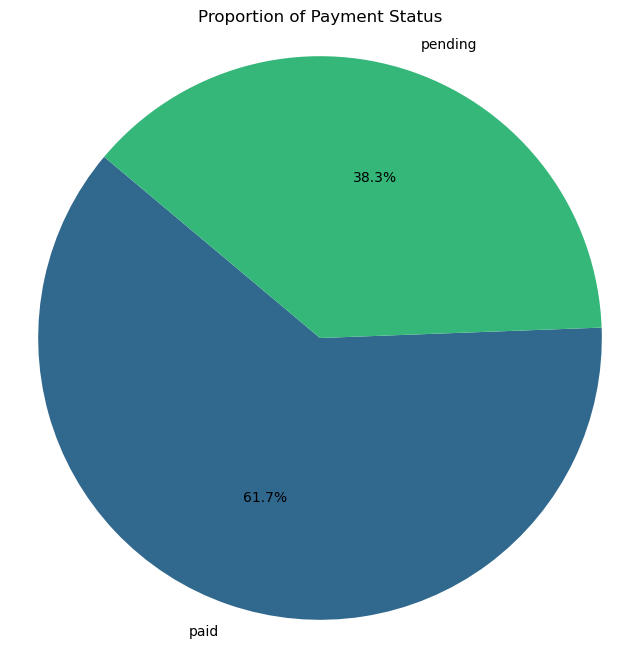

In [ ]:
payment_status_counts = df['Payment_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(payment_status_counts, labels=payment_status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(payment_status_counts)))
plt.title('Proportion of Payment Status')
plt.axis('equal')
plt.show()

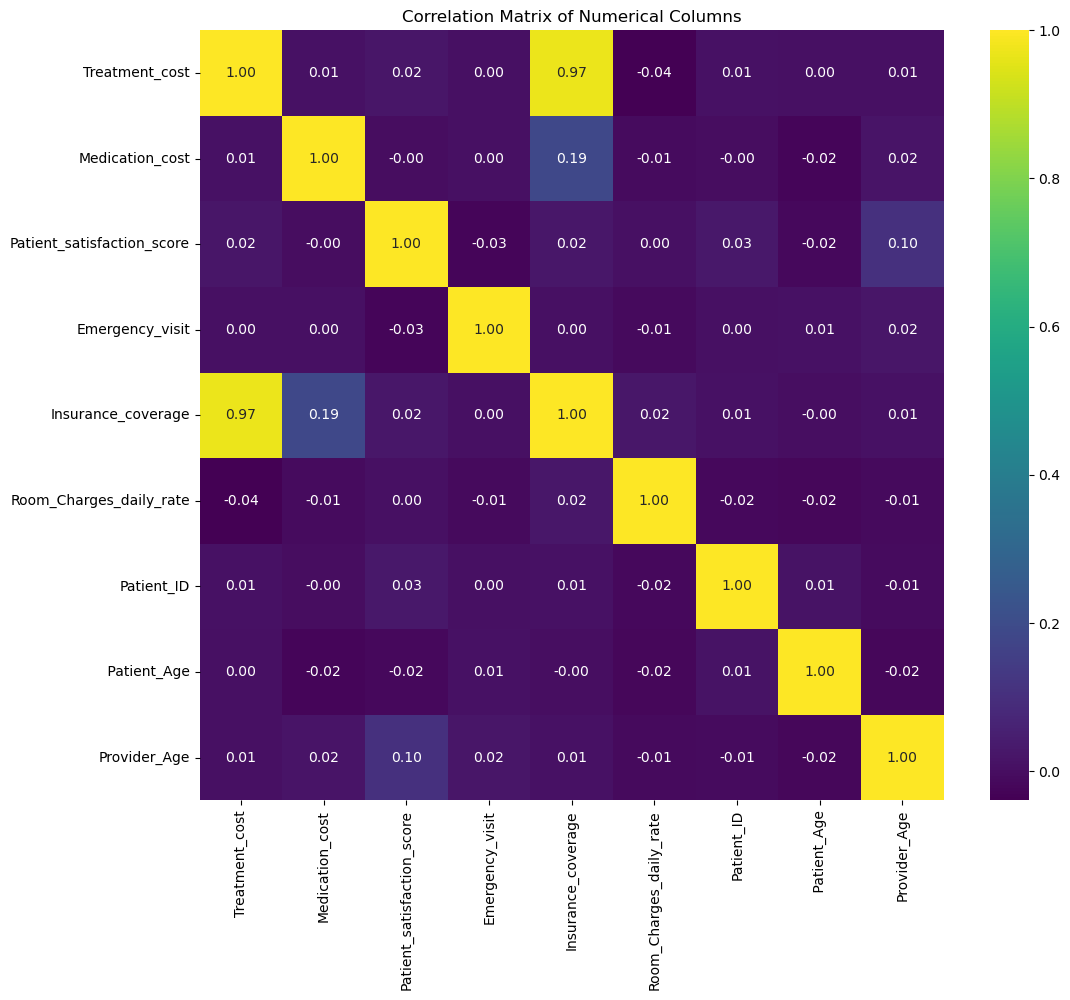

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

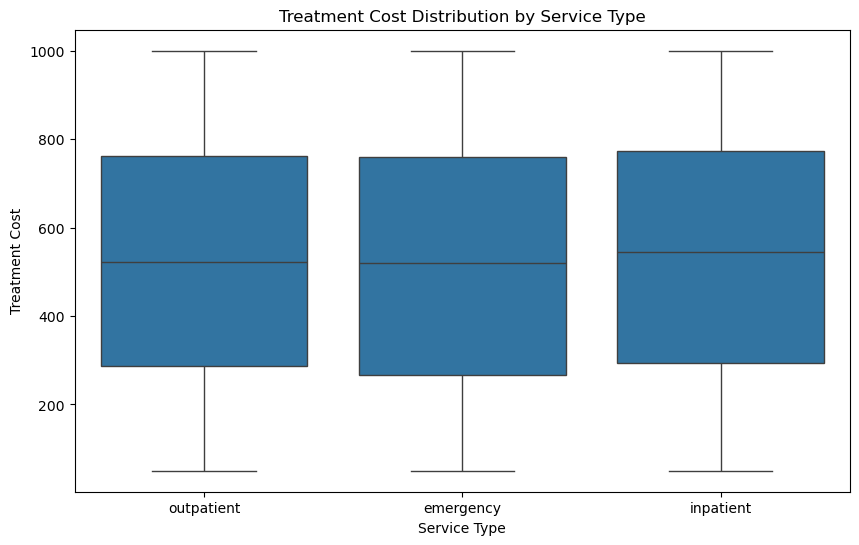

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Service_Type', y='Treatment_cost', data=df)
plt.title('Treatment Cost Distribution by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Treatment Cost')
plt.show()

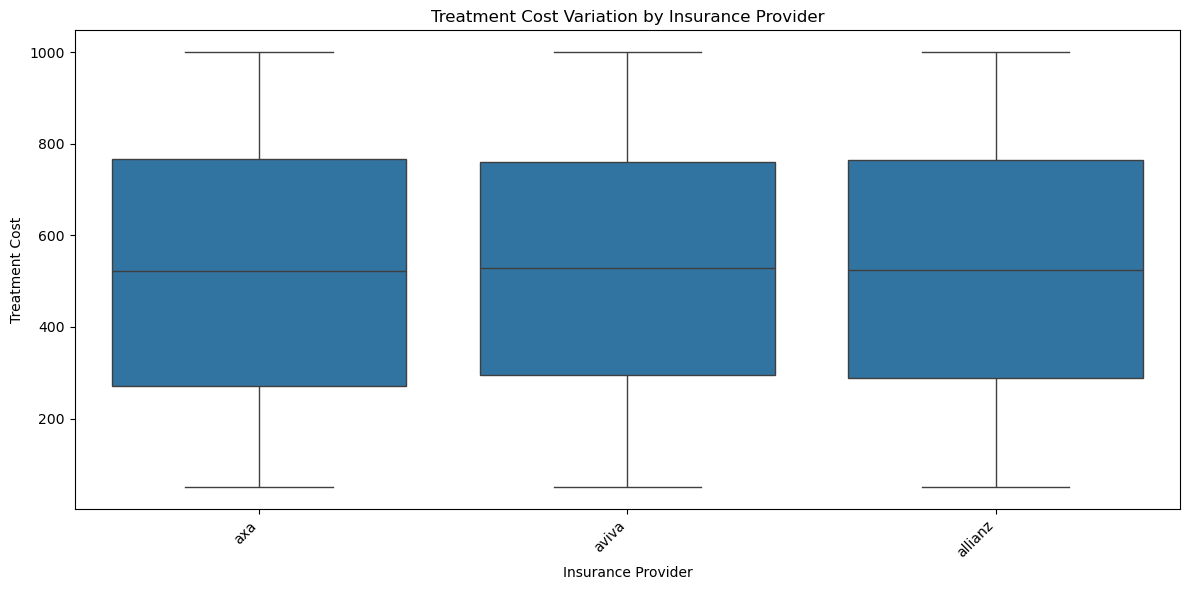

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Insurance_Provider', y='Treatment_cost', data=df)
plt.title('Treatment Cost Variation by Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Treatment Cost')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

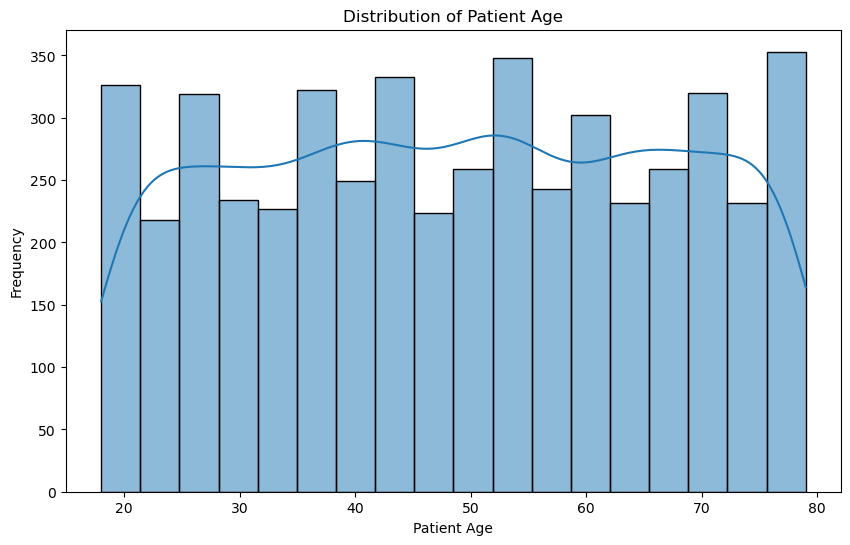

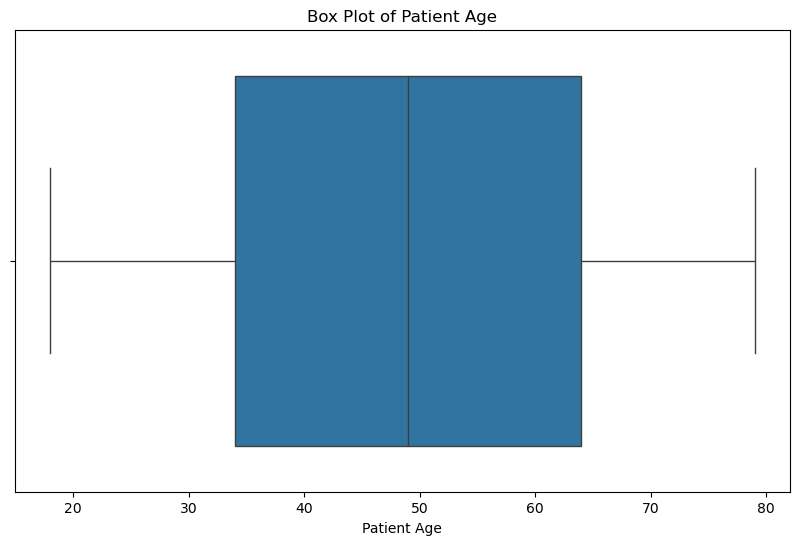

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' Patient_Age'], kde=True)
plt.title('Distribution of Patient Age')
plt.xlabel('Patient Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df[' Patient_Age'])
plt.title('Box Plot of Patient Age')
plt.xlabel('Patient Age')
plt.show()

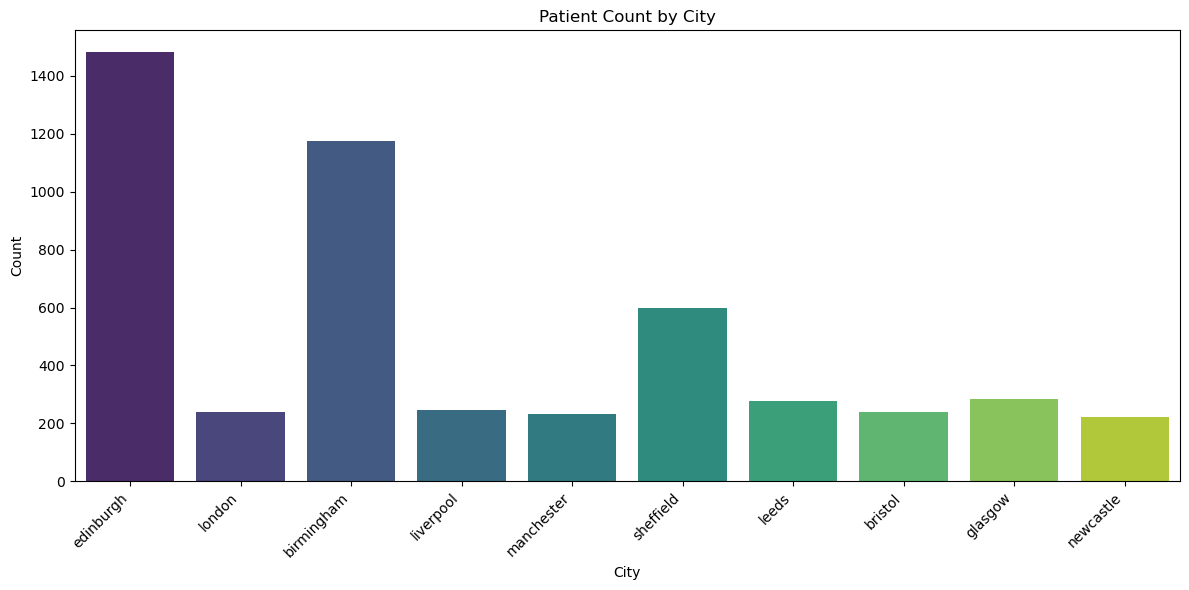

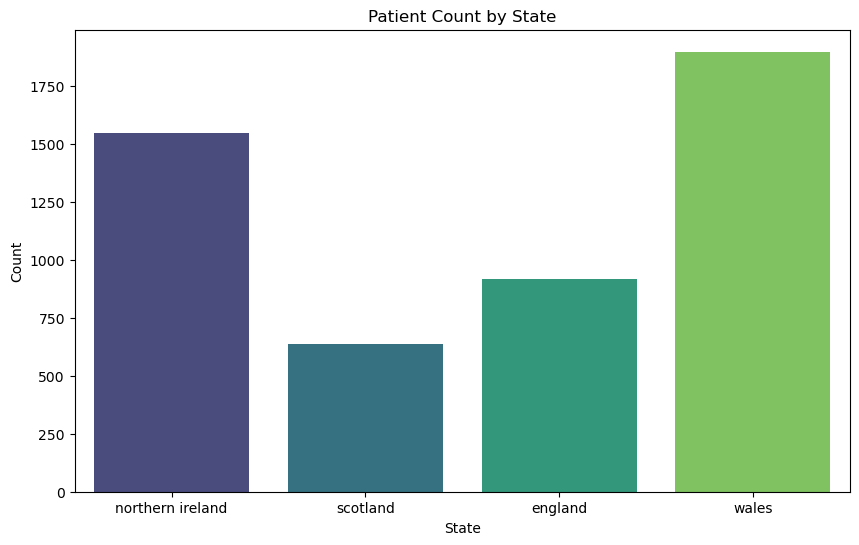

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='City', data=df, hue='City', palette='viridis', legend=False)
plt.title('Patient Count by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='State', data=df, hue='State', palette='viridis', legend=False)
plt.title('Patient Count by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.show()

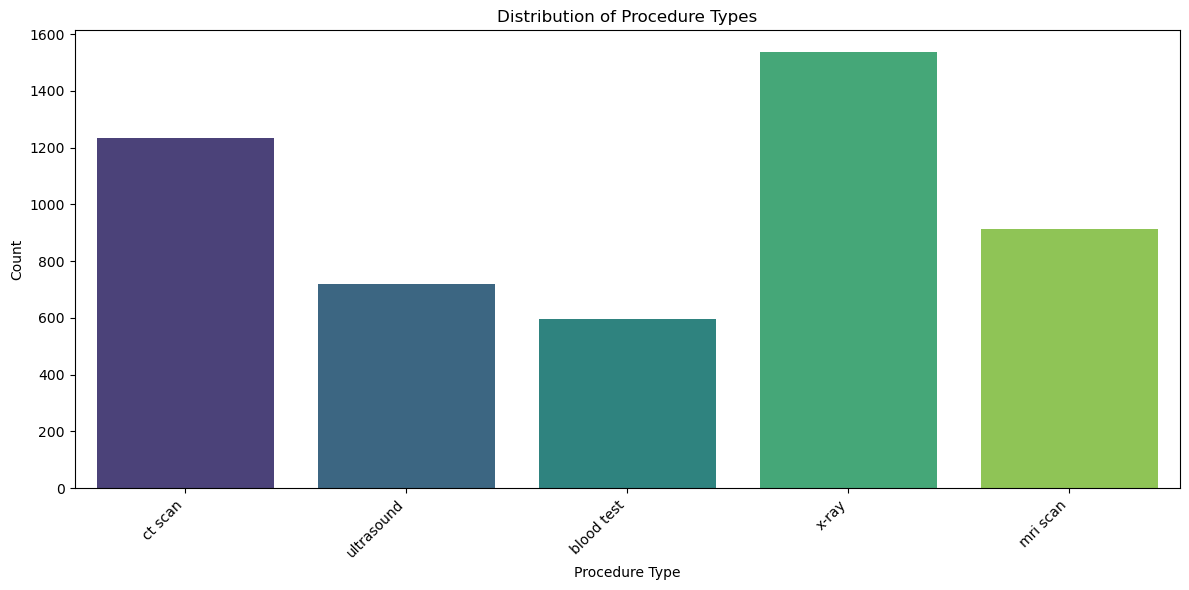

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Procedure', data=df, hue='Procedure', palette='viridis', legend=False)
plt.title('Distribution of Procedure Types')
plt.xlabel('Procedure Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,Date_of_visit,Service_Type,Treatment_cost,Medication_cost,Patient_satisfaction_score,Emergency_visit,Payment_status,Insurance_coverage,Room_Charges_daily_rate,Patient_ID,...,City,State,Diagnosis,Procedure,Insurance_Provider,Provider_Name,Provider_Gender,Nationality,Provider_Age,Department
0,2025-04-09,outpatient,127,99,2,0,paid,179.199997,30,1,...,edinburgh,northern ireland,fracture,ct scan,axa,dr. olu abisola,male,nigerian,37,orthopedics
1,2024-06-23,emergency,624,171,2,1,paid,563.500000,10,2,...,london,scotland,asthma,ultrasound,aviva,dr. sade kikiola,female,nigerian,35,general surgery
2,2025-02-07,emergency,301,91,8,0,paid,295.399994,30,3,...,edinburgh,northern ireland,asthma,ultrasound,axa,dr. sade kikiola,female,nigerian,35,neurology
3,2024-09-15,outpatient,234,174,3,0,paid,285.600006,0,4,...,edinburgh,england,hypertension,blood test,allianz,dr. emma jones,female,european,34,cardiology
4,2024-04-15,outpatient,621,27,1,0,pending,453.600006,0,5,...,edinburgh,england,asthma,ct scan,allianz,dr. sade kikiola,female,nigerian,35,cardiology


In [33]:
df.replace("NULL", np.nan, inplace=True)
df.replace("NULL", np.nan, inplace=True)
df.dropna(inplace=True)

In [35]:
df.to_csv("cleaned_healthcare_data.csv", index=False)